In [1]:
from numpy import arange, asarray, linspace, zeros, c_, mgrid, meshgrid, array, dot, percentile
from numpy import histogram, cumsum, around
from numpy import vstack, sqrt, logspace, amin, amax, equal, invert, count_nonzero
from numpy.random import uniform, seed, randint, randn, multivariate_normal

from matplotlib.pyplot import subplots, scatter, xlabel, ylabel, axis, figure, colorbar, title
from matplotlib.colors import LogNorm

from pandas import read_csv


# Assignment


Create the training and prediction workflow as above for a data set with two other features, namely: Diastole and Systole values from the 'patients_data.csv' file.

1. Extract the Diastole and Systole columns
2. Use the data to fit a Gaussian model with 2 components and create a state space contour plot of the negative log likelihood with scattered data superimposed.
3. Extract the model weights, the means of the two Gaussians and their corresponding covariance matrices.
4. Calculate the adjusted random score for the labels 'gender' and 'smoker' in the data to estimate whether these have som overlap with the model fit.
5. Compare the original scatter plot versus the model generated scatter plot. Use a total of 100 samples for the model generated data and distribute them according to the model weights.
6. Repeat the plot multiple times to see how the degree of overlap in the model output changes with each choice of samples from the fitted distribution. 
7. Create corresponding histograms of the Diastolic and Systolic blood pressure values from data and model. Try to guess where the differences in appearance come from.


The data show systematic gaps in the histogram meaning that some values do not occur (integer values only). In contrast, the model data from the random number generator can take any value. Therefore the counts per bin are generally lower for the model. 

In [2]:
from sklearn.mixture import GaussianMixture; from sklearn.metrics.cluster import adjusted_rand_score

In [7]:
#QUESTION 1
df = read_csv('data/patients_data.csv'); df_np = df.to_numpy()
print(df)
sys_dia = df_np[:, [3, 4]]
print(sys_dia)

    Age  Height  Weight  Systolic  Diastolic  Smoker  Gender
0    38      71   176.0     124.0       93.0       1    Male
1    43      69   163.0     109.0       77.0       0    Male
2    38      64   131.0     125.0       83.0       0  Female
3    40      67   133.0     117.0       75.0       0  Female
4    49      64   119.0     122.0       80.0       0  Female
..  ...     ...     ...       ...        ...     ...     ...
95   25      69   171.0     128.0       99.0       1    Male
96   44      69   188.0     124.0       92.0       1    Male
97   49      70   186.0     119.0       74.0       0    Male
98   45      68   172.0     136.0       93.0       1    Male
99   48      66   177.0     114.0       86.0       0    Male

[100 rows x 7 columns]
[[124.0 93.0]
 [109.0 77.0]
 [125.0 83.0]
 [117.0 75.0]
 [122.0 80.0]
 [121.0 70.0]
 [130.0 88.0]
 [115.0 82.0]
 [115.0 78.0]
 [118.0 86.0]
 [114.0 77.0]
 [115.0 68.0]
 [127.0 74.0]
 [130.0 95.0]
 [114.0 79.0]
 [130.0 92.0]
 [124.0 95.0]
 [123.

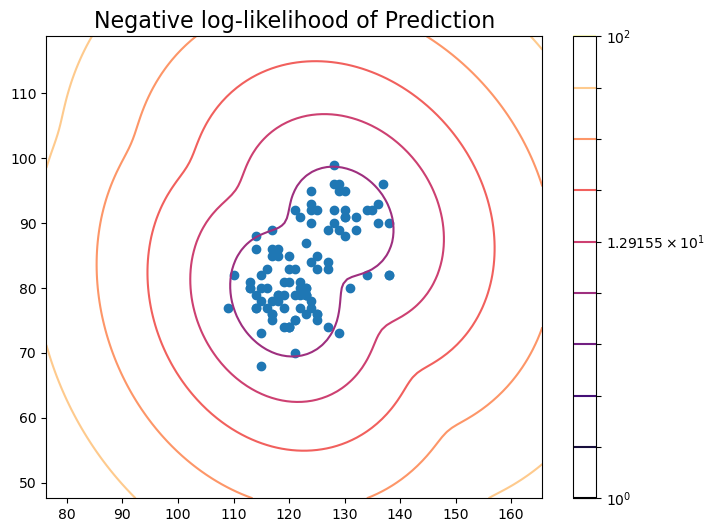

In [9]:
# QUESTION 2
clf = GaussianMixture(n_components=2, covariance_type='full')
clf.fit(sys_dia)

resolution = 100
vec_a = linspace(0.7*min(X[:,0]), 1.2*max(X[:,0]), resolution); vec_b = linspace(0.7*min(X[:,1]), 1.2*max(X[:,1]), resolution)

grid_a, grid_b = meshgrid(vec_a, vec_b)

XY_statespace = c_[grid_a.ravel(), grid_b.ravel()];

Z_score = clf.score_samples(XY_statespace);

Z_s = Z_score.reshape(grid_a.shape);

fig, ax = subplots(figsize=(8, 6))

cax = ax.contour(grid_a, grid_b, -Z_s,
           norm=LogNorm(vmin=1.0, vmax=100.0),
           levels=logspace(0, 2, 10),
           cmap='magma'
          );

fig.colorbar(cax);

ax.scatter(sys_dia[:, 0], X[:, 1]);

title('Negative log-likelihood of Prediction', fontsize=16)
axis('tight');

In [10]:
#QUESTION 3
print('Model Weights: ')
print(clf.weights_)
print('')

print('Mean coordinates: ')
print(clf.means_)
print('')
print('Covariance Matrices: ')
print(clf.covariances_)

Model Weights: 
[0.6536435 0.3463565]

Mean coordinates: 
[[119.21094489  79.01963203]
 [129.51551579  90.3962569 ]]

Covariance Matrices: 
[[[18.62154032 -2.53646526]
  [-2.53646526 17.70124705]]

 [[24.25340701 -3.75701522]
  [-3.75701522 19.36301886]]]


In [13]:
#QUESTION 4
y_predict = clf.predict(sys_dia)

gender_boolean = df['Gender'] == 'Female'

y_gender = gender_boolean.to_numpy()

scoring = adjusted_rand_score(y_gender, y_predict)

print(scoring)
y_smoker = df['Smoker']

scoring = adjusted_rand_score(y_smoker, y_predict)

print(scoring)

0.030809331315545804
0.7349708237209933


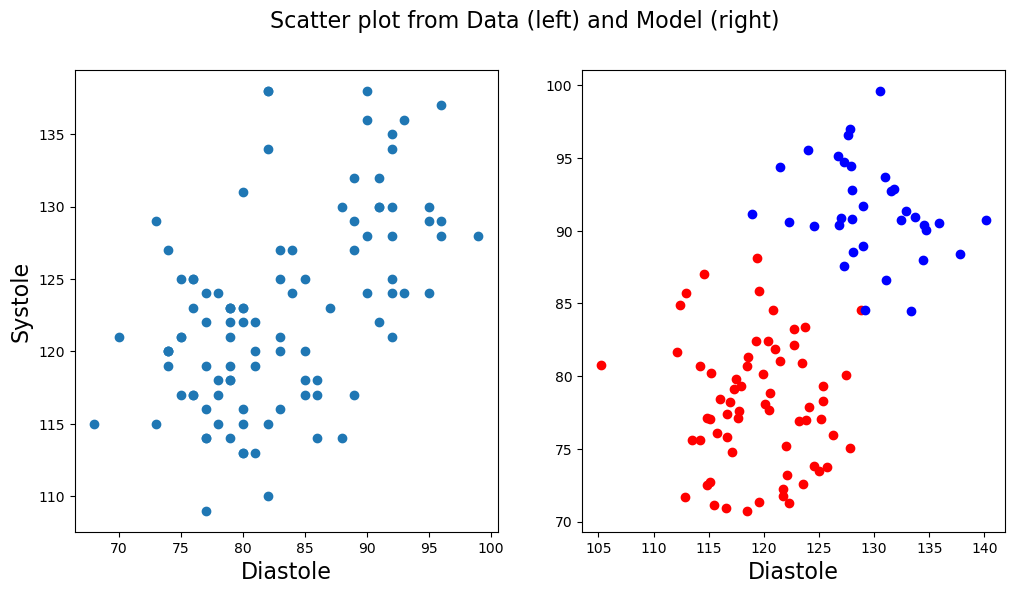

In [19]:
#QUESTION 5
group1_mean = clf.means_[0]
group1_cov  = clf.covariances_[0]

group2_mean = clf.means_[1]
group2_cov  = clf.covariances_[1]

samples = 100

group1_data = multivariate_normal(group1_mean, group1_cov, int(clf.weights_[0]*100))
group2_data = multivariate_normal(group2_mean, group2_cov, int(clf.weights_[1]*100))

fig, ax = subplots(ncols=2, figsize=(12, 6))

ax[0].scatter(df['Diastolic'], df['Systolic']);
ax[0].set_xlabel('Diastole', fontsize=16)
ax[0].set_ylabel('Systole', fontsize=16)

ax[1].scatter(group1_data[:, 0], group1_data[:, 1], c='r');
ax[1].scatter(group2_data[:, 0], group2_data[:, 1], c='b');
ax[1].set_xlabel('Diastole', fontsize=16)

fig.suptitle('Scatter plot from Data (left) and Model (right)', fontsize=16);
#QUESTION 6: repeated run multiple times

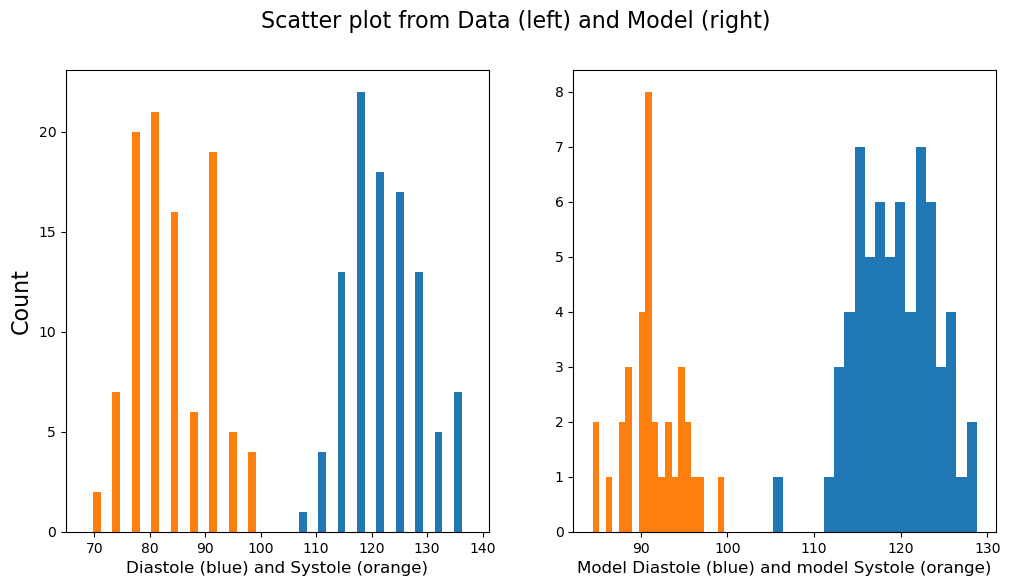

In [20]:
#QUESTION 7
fig, ax = subplots(ncols=2, figsize=(12, 6))

bins = 20
ax[0].hist(X, bins=bins);
ax[0].set_xlabel('Diastole (blue) and Systole (orange)', fontsize=12)
ax[0].set_ylabel('Count', fontsize=16)

ax[1].hist(group1_data[:, 0], bins=bins);
ax[1].hist(group2_data[:, 1], bins=bins);
ax[1].set_xlabel('Model Diastole (blue) and model Systole (orange)', fontsize=12)

fig.suptitle('Scatter plot from Data (left) and Model (right)', fontsize=16);